In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = '../data/house_prices_dataset.csv'
housing = pd.read_csv(file_path)

In [4]:
housing.head()

,area,price
0,2231.88,558852.17
1,2524.92,632260.29
2,1527.65,382994.25
3,1986.09,497607.86
4,2920.16,730870.84


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    100 non-null    float64
 1   price   100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [6]:
housing.describe()

,area,price
count,100.00000,100.000000
mean,2247.97960,562990.340700
std,453.86445,113464.467239
min,1522.16000,381657.070000
25%,1812.84750,454164.525000
50%,2284.15000,571887.305000
75%,2617.72750,655407.227500
max,2995.40000,749686.490000


In [36]:
x_train = housing['area'].values
y_train = housing['price'].values

In [44]:
x_mean = np.mean(x_train)
x_std = np.std(x_train)
x_scaled = (x_train - x_mean) / x_std

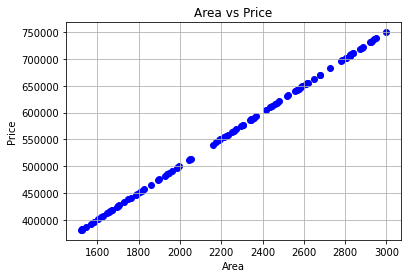

In [10]:
plt.scatter(x_train,y_train,c='b')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price")
plt.grid(True)
plt.show()

In [11]:
print(x_train.shape[0])

100


In [45]:
def cost_funct(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w*x[i] + b
        cost = cost + (f_wb - y[i])**2
    cost = cost/(2*m)
    return cost    

In [46]:
def gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_w = w * x[i] + b

        dj_dw += (f_w - y[i])*x[i]
        dj_db += (f_w - y[i])
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw,dj_db   

In [47]:
import math,copy
def gradient_descent(x,y,w_in,b_in,cost_funct,gradient,alpha,num_iters):

    j_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_dw,dj_db = gradient(x,y,w,b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db

        if i<10000:
            j_history.append(cost_funct(x,y,w,b))

        if i%math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}:cost {j_history[-1]}, w = {w:.4f},b = {b:.4f}")


    return w,b,j_history

In [56]:
w= 0
b= 0
w_final,b_final,j_hist = gradient_descent(x_scaled,y_train,w,b,cost_funct,gradient,alpha=0.01,num_iters=10000)
print(f"final parameters : w = {w_final:.4f},b = {b_final:.4f}")

Iteration    0:cost 161571233220.59195, w = 1128.9567,b = 5629.9034
Iteration 1000:cost 6186.563430817435, w = 112890.8422,b = 562966.2788
Iteration 2000:cost 5885.433989575195, w = 112895.6671,b = 562990.3397
Iteration 3000:cost 5885.433989014257, w = 112895.6673,b = 562990.3407
Iteration 4000:cost 5885.433989014697, w = 112895.6673,b = 562990.3407
Iteration 5000:cost 5885.433989014697, w = 112895.6673,b = 562990.3407
Iteration 6000:cost 5885.433989014697, w = 112895.6673,b = 562990.3407
Iteration 7000:cost 5885.433989014697, w = 112895.6673,b = 562990.3407
Iteration 8000:cost 5885.433989014697, w = 112895.6673,b = 562990.3407
Iteration 9000:cost 5885.433989014697, w = 112895.6673,b = 562990.3407
final parameters : w = 112895.6673,b = 562990.3407


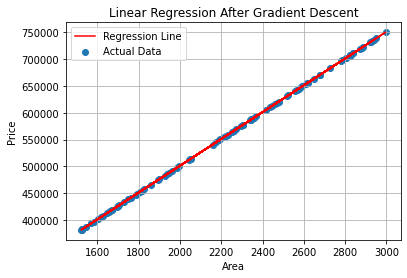

In [57]:
# Convert x to scaled again for prediction
x_pred = (x_train - x_mean) / x_std
y_pred = w_final * x_pred + b_final

plt.scatter(x_train, y_train, label="Actual Data")
plt.plot(x_train, y_pred, color='red', label="Regression Line")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Linear Regression After Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()


In [58]:
area_new = 2100
area_newScale = (area_new - x_mean)/x_std
prediction = w_final * area_newScale + b_final
print(f"Predicted price for {area_new}sqft:${prediction:.2f}")


Predicted price for 2100sqft:$525995.99


In [59]:
areas = np.array([1000, 1500, 2000, 2500, 3000])
areas_scaled = (areas - x_mean) / x_std
prices_pred = w_final * areas_scaled + b_final

for a, p in zip(areas, prices_pred):
    print(f"Area: {a} sqft → Predicted Price: ₹{p:.2f}")


Area: 1000 sqft → Predicted Price: ₹251000.11
Area: 1500 sqft → Predicted Price: ₹375998.24
Area: 2000 sqft → Predicted Price: ₹500996.37
Area: 2500 sqft → Predicted Price: ₹625994.50
Area: 3000 sqft → Predicted Price: ₹750992.63


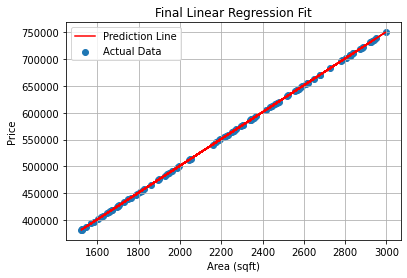

In [60]:
plt.scatter(x_train, y_train, label="Actual Data")
plt.plot(x_train, w_final * ((x_train - x_mean) / x_std) + b_final, color='red', label="Prediction Line")
plt.xlabel("Area (sqft)")
plt.ylabel("Price")
plt.title("Final Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()
